In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier, TensorFlowV2Classifier


# tf.compat.v1.disable_eager_execution()


x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

2024-04-02 15:24:58.530010: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:24:58.533026: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:24:58.566602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 15:24:59.256787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import joblib
from joblib import load, dump

input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))
dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])




early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

classifier = TensorFlowV2Classifier(model=dnn_model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

# dump(dnn_model, "/home/jovyan/Edge-IIoT/pre_train/D.joblib")


# # classifier.fit(x_train, y_train, nb_epochs=10, batch_size=128,validation_data=(x_val, y_val),
# #                      callbacks=[early_stopping])

# # hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
# #                      validation_data=(x_val, y_val),
# #                      callbacks=[early_stopping])

# test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)

# y_hat = dnn_model.predict(x_test)
# y_hat = np.argmax(y_hat, axis=-1)




Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-02 15:25:01.636120: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6226 - loss: 1.0002 - val_accuracy: 0.9813 - val_loss: 0.0838
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.0579 - val_accuracy: 0.9839 - val_loss: 0.0487
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.0422 - val_accuracy: 0.9856 - val_loss: 0.0388
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0321 - val_accuracy: 0.9856 - val_loss: 0.0354
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9875 - loss: 0.0322 - val_accuracy: 0.9856 - val_loss: 0.0342
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9866 - loss: 0.0340 - val_accuracy: 0.9856 - val_loss: 0.0362
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9871 - loss: 0.0327 - val_accuracy: 0.9856 - val_loss: 0.0335
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0342 - val_accuracy: 0.9856 - val_loss: 0.0325
Epo

In [4]:
# model = joblib.load("/home/jovyan/Edge-IIoT/pre_train/DNN.joblib")


epsilon = 0.01
FPR: [0.00025031 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.999484   1.        ]
FNR: [0.32748538 0.         0.000516   0.        ]
TNR: [0.99974969 1.         0.97486535 1.        ]
Accuracy: 0.9863178108497359
Precision(micro,macro,weighted): 0.9863178108497359,0.9908202415350278,0.9865749570331792
F1(micro,macro,weighted: 0.9863178108497359,0.9467234002572247,0.9851025158482887
FPR: 0.006346240700336822
tpr: 0.917999656002752
fnr: 0.08200034399724802
tnr: 0.9936537592996633


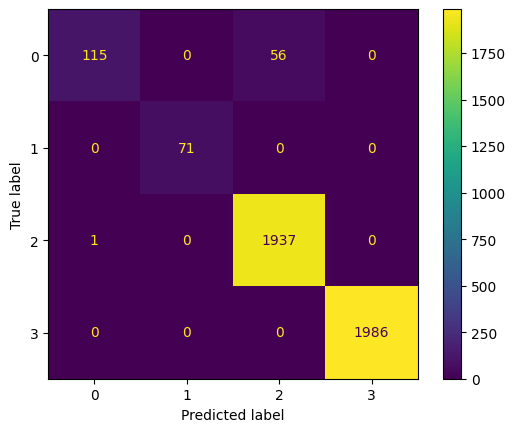

epsilon = 0.1
FPR: [0.03954944 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.91847265 1.        ]
FNR: [0.32748538 0.         0.08152735 0.        ]
TNR: [0.96045056 1.         0.97486535 1.        ]
Accuracy: 0.9486317810849736
Precision(micro,macro,weighted): 0.9486317810849736,0.8476860829802007,0.9620551742491253
F1(micro,macro,weighted: 0.9486317810849736,0.8653285638579756,0.9538380194885235
FPR: 0.016171021676557096
tpr: 0.8977468180254558
fnr: 0.1022531819745442
tnr: 0.9838289783234428


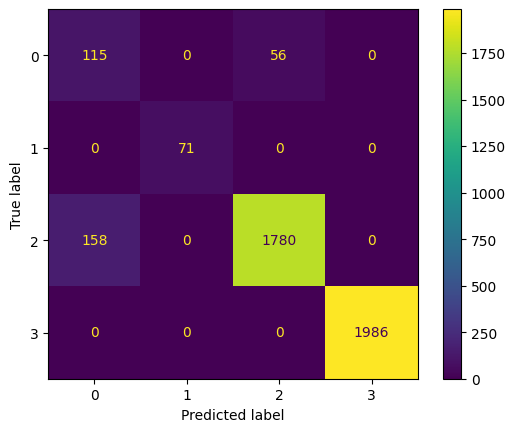

epsilon = 0.2
FPR: [0.06508135 0.         0.03141831 0.        ]
TPR: [0.59064327 0.94366197 0.86790506 1.        ]
FNR: [0.40935673 0.05633803 0.13209494 0.        ]
TNR: [0.93491865 1.         0.96858169 1.        ]
Accuracy: 0.9207873259721555
Precision(micro,macro,weighted): 0.9207873259721555,0.8099560138630643,0.9518508397536829
F1(micro,macro,weighted: 0.9207873259721555,0.8155917143512723,0.9329463130704457
FPR: 0.02412491601935094
tpr: 0.8505525758610832
fnr: 0.14944742413891673
tnr: 0.975875083980649


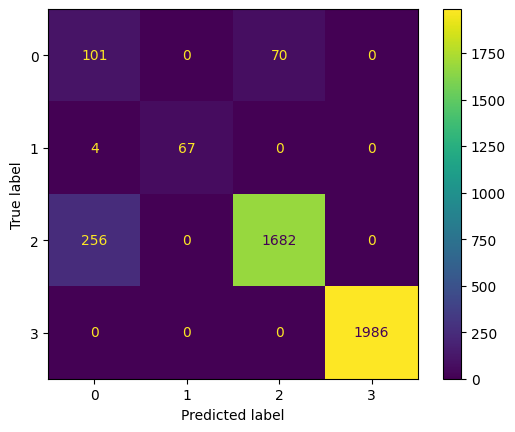

epsilon = 0.3
FPR: [0.12140175 0.07106227 0.05206463 0.00183486]
TPR: [0.58479532 0.94366197 0.74819401 0.83232628]
FNR: [0.41520468 0.05633803 0.25180599 0.16767372]
TNR: [0.87859825 0.92893773 0.94793537 0.99816514]
Accuracy: 0.7849255880940951
Precision(micro,macro,weighted): 0.7849255880940951,0.5704007334119807,0.9165071331673829
F1(micro,macro,weighted: 0.7849255880940951,0.5780059928631123,0.8338061309625697
FPR: 0.061590879398685495
tpr: 0.7772443979760532
fnr: 0.2227556020239468
tnr: 0.9384091206013145


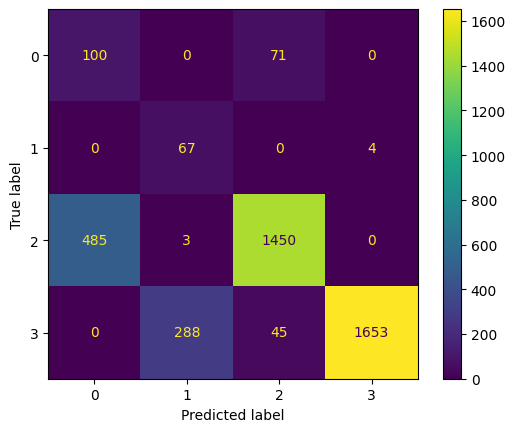

In [5]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import FastGradientMethod

epsilon_values = [0.01, 0.1, 0.2, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = FastGradientMethod(classifier, eps=epsilon)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)
    
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_FGSM_eps_{epsilon}.npy'
    np.save(filename, x_test_adv)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "fgsm",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/model.csv", mode='a', index=False)
